- Table wise Function Application: pipe()
- Row or Column Wise Function Application: apply()
- Element wise Function Application: applymap()

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])

In [5]:
df

,col1,col2,col3
0,0.408174,0.129942,-2.744057
1,-1.052605,1.039154,1.778942
2,0.231875,-1.203745,0.015314
3,-0.210945,0.954757,-1.512296
4,-0.568551,-0.865963,-1.678320


In [7]:
df.apply(np.mean)

col1   -0.238410
col2    0.010829
col3   -0.828083
dtype: float64

In [8]:
df.mean()

col1   -0.238410
col2    0.010829
col3   -0.828083
dtype: float64

In [9]:
df['col1'].mean()

-0.23841047233025323

In [10]:
def add(x,y):
    return x+y

In [12]:
df.pipe(add,2)  #add 2 of each element in the dataframe

,col1,col2,col3
0,2.408174,2.129942,-0.744057
1,0.947395,3.039154,3.778942
2,2.231875,0.796255,2.015314
3,1.789055,2.954757,0.487704
4,1.431449,1.134037,0.321680


In [15]:
df.apply(np.mean, axis=1)

0   -0.735314
1    0.588497
2   -0.318852
3   -0.256161
4   -1.037612
dtype: float64

In [19]:
df.applymap(lambda x : x*10)

,col1,col2,col3
0,4.081744,1.299423,-27.440574
1,-10.526048,10.391539,17.789424
2,2.318745,-12.037453,0.153143
3,-2.109452,9.547571,-15.122956
4,-5.685513,-8.659630,-16.783204


In [43]:
import seaborn as sns
df = sns.load_dataset('iris')

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
## melt - it is used transform or reshape the data
# it is used for wide dataset to long dataset
pd.melt(df)

,variable,value
0,sepal_length,5.1
1,sepal_length,4.9
2,sepal_length,4.7
3,sepal_length,4.6
4,sepal_length,5.0
...,...,...
745,species,virginica
746,species,virginica
747,species,virginica
748,species,virginica


In [28]:
pd.melt(df, id_vars=['sepal_length'],value_vars=['species'] )

,sepal_length,variable,value
0,5.1,species,setosa
1,4.9,species,setosa
2,4.7,species,setosa
3,4.6,species,setosa
4,5.0,species,setosa
...,...,...,...
145,6.7,species,virginica
146,6.3,species,virginica
147,6.5,species,virginica
148,6.2,species,virginica


In [49]:
# pivot - transform or reshape data
df = pd.read_excel(r'Desktop\Book1.xlsx')

In [58]:
df

,date,city,temperature,humidity
0,2017-01-05,new york,65,56
1,2017-01-05,new york,61,54
2,2017-02-05,new york,70,60
3,2017-02-05,new york,72,62
4,2017-01-05,mumbai,75,80
5,2017-01-05,mumbai,78,83
6,2017-02-05,mumbai,82,85
7,2017-02-05,mumbai,80,26


In [54]:
# df.pivot(index='date', columns='city', values='humidity')

In [55]:
## pivot table -summarize and aggerigate the data inside the dataframe
df.pivot_table(index='date', columns = 'city', aggfunc='sum')

humidity          temperature         
city         mumbai new york      mumbai new york
date                                             
2017-01-05      163      110         153      126
2017-02-05      111      122         162      142

In [56]:
df.pivot_table(index=pd.Grouper(freq='M', key='date'), columns='city')

humidity          temperature         
city         mumbai new york      mumbai new york
date                                             
2017-01-31     81.5     55.0        76.5     63.0
2017-02-28     55.5     61.0        81.0     71.0

In [61]:
# CrossTab --Frequency distribution
pd.crosstab(df.date, df.city, margins=True)  #margins - total

city,mumbai,new york,All
date,,,
2017-01-05 00:00:00,2,2,4
2017-02-05 00:00:00,2,2,4
All,4,4,8


In [62]:
pd.crosstab(df.date, [df.city,df.humidity], margins=True)  #multiple 

city                mumbai          new york          All
humidity                26 80 83 85       54 56 60 62    
date                                                     
2017-01-05 00:00:00      0  1  1  0        1  1  0  0   4
2017-02-05 00:00:00      1  0  0  1        0  0  1  1   4
All                      1  1  1  1        1  1  1  1   8

In [64]:
pd.crosstab(df.date, df.city, normalize='index')  #percentage

city,mumbai,new york
date,,
2017-01-05,0.5,0.5
2017-02-05,0.5,0.5


In [69]:
pd.crosstab(df.date, df.city, values='humidity', aggfunc='mean')  #for example

E:\Anaconda\ana\lib\site-packages\pandas\core\apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


city
date
2017-01-05
2017-02-05


In [74]:
# cut - it is cut the array or dataframe into kth part
a = np.array([1,2,3,4,5,6])
labels=["bad", "medium", "good"]

In [75]:
pd.cut(a,3,labels=labels)

['bad', 'bad', 'medium', 'medium', 'good', 'good']
Categories (3, object): ['bad' < 'medium' < 'good']

In [76]:
# qcut - cut the based on quantile

- pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

In [77]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [78]:
df1, df2

(  lkey  value
 0  foo      1
 1  bar      2
 2  baz      3
 3  foo      5,
   rkey  value
 0  foo      5
 1  bar      6
 2  baz      7
 3  foo      8)

In [82]:
pd.merge(df1,df2,left_on='lkey',right_on='rkey',left_index=False, right_index=False)

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [84]:
df1.merge(df2,how='inner', on='value')

,lkey,value,rkey
0,foo,5,foo


In [85]:
df1.merge(df2, how='left',on='value')

,lkey,value,rkey
0,foo,1,NaN
1,bar,2,NaN
2,baz,3,NaN
3,foo,5,foo


In [86]:
df1.merge(df2, how='right',on='value')

,lkey,value,rkey
0,foo,5,foo
1,NaN,6,bar
2,NaN,7,baz
3,NaN,8,foo


In [87]:
df1.merge(df2, how='cross')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,bar,6
2,foo,1,baz,7
3,foo,1,foo,8
4,bar,2,foo,5
5,bar,2,bar,6
6,bar,2,baz,7
7,bar,2,foo,8
8,baz,3,foo,5
9,baz,3,bar,6


In [89]:
df1.merge(df2, how='outer')

,lkey,value,rkey
0,foo,1,NaN
1,bar,2,NaN
2,baz,3,NaN
3,foo,5,foo
4,NaN,6,bar
5,NaN,7,baz
6,NaN,8,foo


- pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)

In [90]:
#concat
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])

In [92]:
pd.concat([s1,s2])

0    a
1    b
0    c
1    d
dtype: object

In [95]:
pd.concat([s1,s2],ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [100]:
pd.concat([s1,s2],keys=['nik','niku','fg','g'], names=['1','2'])

1     2
nik   0    a
      1    b
niku  0    c
      1    d
dtype: object

In [101]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])

In [102]:
pd.concat([df1,df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [103]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
pd.concat([df1,df3])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [104]:
pd.concat([df1,df3], axis=1)

,letter,number,letter,number,animal
0,a,1,c,3,cat
1,b,2,d,4,dog


In [105]:
# pd.get_dummies  - one hot encoding

In [106]:
#factorize - its like label encoding
a = ['a','b','c','a','d']

In [107]:
codes, uniques = pd.factorize(a)

In [108]:
codes

array([0, 1, 2, 0, 3], dtype=int64)

In [109]:
uniques

array(['a', 'b', 'c', 'd'], dtype=object)

In [110]:
# pd.unique()

In [115]:
df.city.unique()

array(['new york', 'mumbai'], dtype=object)

In [116]:
df = pd.DataFrame({
    'famid': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'birth': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'ht1': [2.8, 2.9, 2.2, 2, 1.8, 1.9, 2.2, 2.3, 2.1],
    'ht2': [3.4, 3.8, 2.9, 3.2, 2.8, 2.4, 3.3, 3.4, 2.9]
})

In [117]:
# wide to long
l = pd.wide_to_long(df, stubnames='ht', i=['famid', 'birth'], j='age')
l

ht
famid birth age     
1     1     1    2.8
            2    3.4
      2     1    2.9
            2    3.8
      3     1    2.2
            2    2.9
2     1     1    2.0
            2    3.2
      2     1    1.8
            2    2.8
      3     1    1.9
            2    2.4
3     1     1    2.2
            2    3.3
      2     1    2.3
            2    3.4
      3     1    2.1
            2    2.9

In [118]:
# isna - check na value
df.isna()

,famid,birth,ht1,ht2
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False


In [119]:
df.isna().sum()

famid    0
birth    0
ht1      0
ht2      0
dtype: int64

In [122]:
# isnull
df.isnull().sum()

famid    0
birth    0
ht1      0
ht2      0
dtype: int64

In [125]:
#notna
df.notna().sum()

famid    9
birth    9
ht1      9
ht2      9
dtype: int64

In [127]:
# notnull
df.notnull().sum()

famid    9
birth    9
ht1      9
ht2      9
dtype: int64

In [128]:
# to_numeric -convert to numeric
a = ['1','2',3,4]
pd.to_numeric(a)

array([1, 2, 3, 4], dtype=int64)

In [129]:
pd.to_numeric(a, downcast='float')  

array([1., 2., 3., 4.], dtype=float32)

In [130]:
pd.to_numeric(a, downcast='signed')

array([1, 2, 3, 4], dtype=int8)

pandas.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)

In [131]:
# to_datetime
date = '2022-01-23'
pd.to_datetime(date)

Timestamp('2022-01-23 00:00:00')

In [132]:
pd.to_datetime(date,dayfirst=True)

Timestamp('2022-01-23 00:00:00')

In [135]:
pd.to_datetime(date,format='%Y-%m-%d')

Timestamp('2022-01-23 00:00:00')

In [138]:
#epoc time
t = 1501356749
x = pd.to_datetime(t, unit='s')
x

Timestamp('2017-07-29 19:32:29')

In [144]:
#date_range
pd.date_range(start='6/1/1998', end='6/30/1998', freq='B')  #B business day

DatetimeIndex(['1998-06-01', '1998-06-02', '1998-06-03', '1998-06-04',
               '1998-06-05', '1998-06-08', '1998-06-09', '1998-06-10',
               '1998-06-11', '1998-06-12', '1998-06-15', '1998-06-16',
               '1998-06-17', '1998-06-18', '1998-06-19', '1998-06-22',
               '1998-06-23', '1998-06-24', '1998-06-25', '1998-06-26',
               '1998-06-29', '1998-06-30'],
              dtype='datetime64[ns]', freq='B')

In [145]:
## df.asfreq('D', method='pad') --> it will give result to previous value

In [146]:
pd.date_range(start='6/1/1998', periods=72)

DatetimeIndex(['1998-06-01', '1998-06-02', '1998-06-03', '1998-06-04',
               '1998-06-05', '1998-06-06', '1998-06-07', '1998-06-08',
               '1998-06-09', '1998-06-10', '1998-06-11', '1998-06-12',
               '1998-06-13', '1998-06-14', '1998-06-15', '1998-06-16',
               '1998-06-17', '1998-06-18', '1998-06-19', '1998-06-20',
               '1998-06-21', '1998-06-22', '1998-06-23', '1998-06-24',
               '1998-06-25', '1998-06-26', '1998-06-27', '1998-06-28',
               '1998-06-29', '1998-06-30', '1998-07-01', '1998-07-02',
               '1998-07-03', '1998-07-04', '1998-07-05', '1998-07-06',
               '1998-07-07', '1998-07-08', '1998-07-09', '1998-07-10',
               '1998-07-11', '1998-07-12', '1998-07-13', '1998-07-14',
               '1998-07-15', '1998-07-16', '1998-07-17', '1998-07-18',
               '1998-07-19', '1998-07-20', '1998-07-21', '1998-07-22',
               '1998-07-23', '1998-07-24', '1998-07-25', '1998-07-26',
      

In [147]:
#Eval - evalute the python expression
df = pd.DataFrame({"animal": ["dog", "pig"], "age": [10, 20]})

In [148]:
pd.eval("double_age = df.age * 2", target=df)

,animal,age,double_age
0,dog,10,20
1,pig,20,40


# series

In [153]:
s = pd.Series(np.arange(5))

In [156]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [157]:
s.array

<PandasArray>
[0, 1, 2, 3, 4]
Length: 5, dtype: int32

In [158]:
s.values

array([0, 1, 2, 3, 4])

In [159]:
s.dtype

dtype('int32')

In [160]:
s.shape

(5,)

In [161]:
s.ndim

1

In [162]:
s.size

5

In [163]:
s.T

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [169]:
s.hasnans #check null value

False

In [171]:
s.empty #check the empty

False

In [175]:
s.name = 'Nikunj'
s

0    0
1    1
2    2
3    3
4    4
Name: Nikunj, dtype: int32

In [176]:
df = pd.DataFrame({"A": [1, 2]})
df.flags

<Flags(allows_duplicate_labels=True)>

In [177]:
s.dtype

dtype('int32')

In [179]:
# change dtype
s.astype('int64').dtype

dtype('int64')

In [182]:
pd.Series([True]).bool()

True

In [185]:
s.to_numpy()

array([0, 1, 2, 3, 4])

In [189]:
s.to_list()

[0, 1, 2, 3, 4]

In [191]:
s.__array__()

array([0, 1, 2, 3, 4])

In [197]:
df = pd.DataFrame(
    [
        [24.3, 75.7, "high"],
        [31, 87.8, "high"],
        [22, 71.6, "medium"],
        [35, 95, "medium"],
    ],
    columns=["temp_celsius", "temp_fahrenheit", "windspeed"])
df

,temp_celsius,temp_fahrenheit,windspeed
0,24.3,75.7,high
1,31.0,87.8,high
2,22.0,71.6,medium
3,35.0,95.0,medium


In [196]:
# get --take out any value
df.get(['windspeed'])  


,windspeed
0,high
1,high
2,medium
3,medium


In [207]:
# at -specific value
# iat - used for index like iloc
df.at[1,'windspeed']

'low'

In [206]:
df.at[1,'windspeed']='low'
df

,temp_celsius,temp_fahrenheit,windspeed
0,24.3,75.7,high
1,31.0,87.8,low
2,22.0,71.6,medium
3,35.0,95.0,medium


In [4]:
# __iter__  -> itretor the item
data = {
  "firstname": ["Sally", "Mary", "John"],
  "age": [50, 40, 30]}
df = pd.DataFrame(data)

In [5]:
for x in df.__iter__():
    print(x)

firstname
age


In [6]:
df.__iter__()

In [11]:
# items and iteritems
for x in df.items():
    print(x)

('firstname', 0    Sally
1     Mary
2     John
Name: firstname, dtype: object)
('age', 0    50
1    40
2    30
Name: age, dtype: int64)


In [12]:
df.keys()

Index(['firstname', 'age'], dtype='object')

In [13]:
a = pd.Series([1,2,3])

In [15]:
a.keys()

RangeIndex(start=0, stop=3, step=1)

In [20]:
a.pop(1)  #delete item using index

2

In [21]:
d = {'num_legs': [4, 4, 2, 2],
     'num_wings': [0, 0, 2, 2],
     'class': ['mammal', 'mammal', 'mammal', 'bird'],
     'animal': ['cat', 'dog', 'bat', 'penguin'],
     'locomotion': ['walks', 'walks', 'flies', 'walks']}
df = pd.DataFrame(data=d)
df = df.set_index(['class', 'animal', 'locomotion'])

In [22]:
df.xs('mammal')

,,num_legs,num_wings
animal,locomotion,,
cat,walks,4,0
dog,walks,4,0
bat,flies,2,2


In [23]:
df.xs(('mammal','dog'))

E:\Anaconda\ana\lib\site-packages\IPython\core\interactiveshell.py:2947: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,num_legs,num_wings
locomotion,,
walks,4,0


In [27]:
a = pd.Series([1,2,3,4])
b = pd.Series([4,3,2,1])

In [28]:
a.add(b)

0    5
1    5
2    5
3    5
dtype: int64

In [29]:
a.sub(b)

0   -3
1   -1
2    1
3    3
dtype: int64

In [30]:
a.mul(b)

0    4
1    6
2    6
3    4
dtype: int64

In [31]:
a.div(b)

0    0.250000
1    0.666667
2    1.500000
3    4.000000
dtype: float64

In [32]:
a.truediv(b)

0    0.250000
1    0.666667
2    1.500000
3    4.000000
dtype: float64

In [34]:
a.floordiv(b)

0    0
1    0
2    1
3    4
dtype: int64

In [36]:
a.mod(b)  # result is remainder

0    1
1    2
2    1
3    0
dtype: int64

In [37]:
a.pow(b)

0    1
1    8
2    9
3    4
dtype: int64

In [38]:
#Series.radd(other, level=None, fill_value=None, axis=0)
# Return Addition of series and other, element-wise (binary operator radd).

In [39]:
s1 = pd.Series({'falcon': 330.0, 'eagle': 160.0})
s2 = pd.Series({'falcon': 345.0, 'eagle': 200.0, 'duck': 30.0})

In [41]:
s1.combine(s2,max)

duck        NaN
eagle     200.0
falcon    345.0
dtype: float64

In [47]:
s1.combine(s2,min, fill_value=0)  #fill nan value

duck        0.0
eagle     160.0
falcon    330.0
dtype: float64

In [49]:
a.round(2)

0    1
1    2
2    3
3    4
dtype: int64

In [50]:
a = pd.Series([1,2,3])
b = pd.Series([5,2,1])

In [52]:
a.lt(b)  #gt, le ,ge, ne, eq

0     True
1    False
2    False
dtype: bool

In [53]:
a.apply(lambda x:x**2)

0    1
1    4
2    9
dtype: int64

In [57]:
a.agg(['min', 'max', 'sum', 'mean'])

min     1.0
max     3.0
sum     6.0
mean    2.0
dtype: float64

In [58]:
a.transform(lambda x:x+1)

0    2
1    3
2    4
dtype: int64

In [59]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])

In [60]:
s.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [61]:
s.map('I am a {}'.format)

0       I am a cat
1       I am a dog
2       I am a nan
3    I am a rabbit
dtype: object

In [62]:
s.map('I am a {}'.format, na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

In [63]:
ser = pd.Series([390., 350., 30., 20.],
                index=['Falcon', 'Falcon', 'Parrot', 'Parrot'])

In [66]:
ser.groupby(level=0).mean()  # sum, max, min

Falcon    370.0
Parrot     25.0
dtype: float64

In [71]:
ser.groupby(ser>100).count()

False    2
True     2
dtype: int64

In [72]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
ser = pd.Series([390., 350., 30., 20.], index=index, name="Max Speed")

In [74]:
ser.groupby(level='Type').sum()

Type
Captive    420.0
Wild       370.0
Name: Max Speed, dtype: float64

In [132]:
import seaborn as sns
df = sns.load_dataset('iris')

In [133]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
df.groupby(df.species).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [85]:
df['sepal_length'].rolling(2).mean()  #m Moving average

0       NaN
1      5.00
2      4.80
3      4.65
4      4.80
       ... 
145    6.70
146    6.50
147    6.40
148    6.35
149    6.05
Name: sepal_length, Length: 150, dtype: float64

In [86]:
df['sepal_length'].rolling(2).sum() 

0       NaN
1      10.0
2       9.6
3       9.3
4       9.6
       ... 
145    13.4
146    13.0
147    12.8
148    12.7
149    12.1
Name: sepal_length, Length: 150, dtype: float64

In [95]:
df.rolling(3).sum()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,14.7,9.7,4.1,0.6
3,14.2,9.3,4.2,0.6
4,14.3,9.9,4.2,0.6
...,...,...,...,...
145,20.2,9.5,16.8,7.1
146,19.7,8.8,15.9,6.7
147,19.5,8.5,15.4,6.2
148,19.0,8.9,15.6,6.2


In [96]:
df.rolling(3, min_periods=2).sum()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,10.0,6.5,2.8,0.4
2,14.7,9.7,4.1,0.6
3,14.2,9.3,4.2,0.6
4,14.3,9.9,4.2,0.6
...,...,...,...,...
145,20.2,9.5,16.8,7.1
146,19.7,8.8,15.9,6.7
147,19.5,8.5,15.4,6.2
148,19.0,8.9,15.6,6.2


In [100]:
df.rolling(5, min_periods=3, center=True).sum()

,sepal_length,sepal_width,petal_length,petal_width
0,14.7,9.7,4.1,0.6
1,19.3,12.8,5.6,0.8
2,24.3,16.4,7.0,1.0
3,24.6,16.8,7.3,1.2
4,24.3,17.2,7.3,1.3
...,...,...,...,...
145,33.0,15.0,27.0,11.0
146,32.4,15.2,26.5,11.0
147,31.6,14.9,25.9,10.3
148,24.9,11.9,20.7,8.0


In [101]:
df.rolling(2, win_type='gaussian').sum(std=3)

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,9.862071,6.410346,2.761380,0.394483
2,9.467588,6.114484,2.662759,0.394483
3,9.171726,6.213105,2.761380,0.394483
4,9.467588,6.607588,2.860001,0.394483
...,...,...,...,...
145,13.215175,6.213105,10.749658,4.733794
146,12.820693,5.424139,10.059313,4.142070
147,12.623451,5.424139,10.059313,3.846208
148,12.524830,6.311726,10.453795,4.240691


In [105]:
df['sepal_length'].expanding(4).sum()  # cummalative sum, mean,

0        NaN
1        NaN
2        NaN
3       19.3
4       24.3
       ...  
145    851.6
146    857.9
147    864.4
148    870.6
149    876.5
Name: sepal_length, Length: 150, dtype: float64

In [107]:
df['sepal_length'].expanding(4).max()

0      NaN
1      NaN
2      NaN
3      5.1
4      5.1
      ... 
145    7.9
146    7.9
147    7.9
148    7.9
149    7.9
Name: sepal_length, Length: 150, dtype: float64

In [110]:
df['sepal_length'].ewm(com=0.1).mean()

0      5.100000
1      4.916667
2      4.719549
3      4.610861
4      4.964626
         ...   
145    6.700149
146    6.336377
147    6.485125
148    6.225920
149    5.929629
Name: sepal_length, Length: 150, dtype: float64

In [111]:
df['sepal_length'].ewm(alpha=0.5, ignore_na=True).mean()

0      5.100000
1      4.966667
2      4.814286
3      4.700000
4      4.854839
         ...   
145    6.660675
146    6.480337
147    6.490169
148    6.345084
149    6.122542
Name: sepal_length, Length: 150, dtype: float64

In [113]:
df['sepal_length'].ewm(alpha=0.5, adjust=True).mean()  #adjust = False its both use different formula

0      5.100000
1      4.966667
2      4.814286
3      4.700000
4      4.854839
         ...   
145    6.660675
146    6.480337
147    6.490169
148    6.345084
149    6.122542
Name: sepal_length, Length: 150, dtype: float64

In [115]:
df['sepal_length'].autocorr()

0.5936971024311022

In [119]:
df['sepal_length'].autocorr(5)  #lag=5

0.5712810795994404

In [122]:
s = pd.Series([2, 0, 4, 8, np.nan])
s.between(1,4)

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [121]:
s = pd.Series(['Alice', 'Bob', 'Carol', 'Eve'])
s.between('Bob','Eve')

0    False
1     True
2     True
3     True
dtype: bool

In [128]:
s.between(1,4, inclusive='right')  #inclusive - both, neighther, left

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [129]:
data = {'col_0': [9, -3, 0, -1, 5], 'col_1': [-2, -7, 6, 8, -5]}
df = pd.DataFrame(data)

In [130]:
df.clip(-4,6)  #clip(lower, upper)  if any value lower the lowerlimnit than take lower value

,col_0,col_1
0,6,-2
1,-3,-4
2,0,6
3,-1,6
4,5,-4


In [134]:
df['sepal_length'].corr(df['sepal_width'], method='pearson')

-0.11756978413300208

In [135]:
df['sepal_length'].corr(df['sepal_width'], method='spearman')

-0.166777658283235

In [137]:
s = pd.Series([2, np.nan, 5, -1, 0])
s.cummax() # its like expanding, cummin, cumrod, cumsum

0    2.0
1    NaN
2    5.0
3    5.0
4    5.0
dtype: float64

In [138]:
s.describe()  #numerical value

count    4.000000
mean     1.500000
std      2.645751
min     -1.000000
25%     -0.250000
50%      1.000000
75%      2.750000
max      5.000000
dtype: float64

In [139]:
s = pd.Series(['a', 'a', 'b', 'c'])  # catregorical value
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

In [140]:
s = pd.Series([1, 1, 2, 3, 5, 8])
s.diff()

0    NaN
1    0.0
2    1.0
3    1.0
4    2.0
5    3.0
dtype: float64

In [141]:
s.diff(periods=3)

0    NaN
1    NaN
2    NaN
3    2.0
4    4.0
5    6.0
dtype: float64

In [142]:
#Factorize - like label encode

In [143]:
df['sepal_length'].kurt()

-0.5520640413156395

In [144]:
s.mad()  #mean absolute deviation

2.111111111111111

In [145]:
s.mode(dropna=True)

0    1
dtype: int64

In [146]:
countries_population = {"Italy": 59000000, "France": 65000000,
                        "Malta": 434000, "Maldives": 434000,
                        "Brunei": 434000, "Iceland": 337000,
                        "Nauru": 11300, "Tuvalu": 11300,
                        "Anguilla": 11300, "Montserrat": 5200}
s = pd.Series(countries_population)

In [148]:
s.nlargest(2)

France    65000000
Italy     59000000
dtype: int64

In [150]:
s.nsmallest(2)

Montserrat     5200
Nauru         11300
dtype: int64

In [153]:
s = pd.Series([90, 91, 85])  #percentage change row wise in dataframe
s.pct_change(fill_method='ffill')  #fill method is fill nan value

0         NaN
1    0.011111
2   -0.065934
dtype: float64

In [155]:
s = pd.Series([1, 2, 3, 4,5])
s.quantile(0.25)
s.quantile(0.5)

3.0

In [156]:
# Rank  
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                   'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})
df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank
0,cat,4.0,2.5,3.0,2.5,0.625
1,penguin,2.0,1.0,1.0,1.0,0.250
2,dog,4.0,2.5,3.0,2.5,0.625
3,spider,8.0,4.0,4.0,4.0,1.000
4,snake,NaN,NaN,NaN,5.0,NaN


In [157]:
#sem - standard error of the mean

In [158]:
s.skew()

0.0

In [159]:
s.std()

1.5811388300841898

In [161]:
s.kurt()

-1.2000000000000002

In [162]:
s.kurtosis()

-1.2000000000000002

In [163]:
s.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [165]:
s.is_unique

True

In [169]:
s.is_monotonic  # monotonic means value is eigher decrease or increase

True

In [174]:
s.is_monotonic_decreasing

False

In [178]:
s.value_counts()

1    1
2    1
3    1
4    1
5    1
dtype: int64

In [179]:
df = pd.DataFrame(
    [[1, 2, 3, 4], [6, 7, 8, 9]], columns=["D", "B", "E", "A"], index=[1, 2]
)
other = pd.DataFrame(
    [[10, 20, 30, 40], [60, 70, 80, 90], [600, 700, 800, 900]],
    columns=["A", "B", "C", "D"],
    index=[2, 3, 4],
)

In [182]:
df.align(other, join='outer')

(     A    B   C    D    E
 1  4.0  2.0 NaN  1.0  3.0
 2  9.0  7.0 NaN  6.0  8.0
 3  NaN  NaN NaN  NaN  NaN
 4  NaN  NaN NaN  NaN  NaN,
        A      B      C      D   E
 1    NaN    NaN    NaN    NaN NaN
 2   10.0   20.0   30.0   40.0 NaN
 3   60.0   70.0   80.0   90.0 NaN
 4  600.0  700.0  800.0  900.0 NaN)

In [184]:
# s.drop(level=["row-index"])

In [186]:
s = pd.Series(['lama', 'cow', 'lama', 'beetle', 'lama', 'hippo'],
              name='animal')
s.drop_duplicates()

0      lama
1       cow
3    beetle
5     hippo
Name: animal, dtype: object

In [187]:
animals = pd.Series(['lama', 'cow', 'lama', 'beetle', 'lama'])
animals.duplicated()  #the first occurrence is set on False and all others on True

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [188]:
# Series.equals(other)
# Test whether two objects contain the same elements.

In [189]:
i = pd.date_range('2018-04-09', periods=4, freq='2D')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
ts

,A
2018-04-09,1
2018-04-11,2
2018-04-13,3
2018-04-15,4


In [193]:
ts.first('3D')  #ts.last('3D')

,A
2018-04-09,1
2018-04-11,2


In [194]:
# idmax/idmin --> show index for max/min value

In [195]:
s = pd.Series(['lama', 'cow', 'lama', 'beetle', 'lama',
               'hippo'], name='animal')
s.isin(['cow', 'lama'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

In [196]:
# df.reindex(new_index)

In [197]:
# df2.reindex_like(df1)

In [198]:
# s.rename({1: 3, 2: 5})  # mapping, changes labels

In [199]:
# s.rename_axis("animal")

In [200]:
# s.reset_index()

In [201]:
# df.sample(frac=0.5, replace=True, random_state=1)

In [202]:
# s.set_axis(['a', 'b', 'c'], axis=0)

In [203]:
#take - give the selected index
#tail - last record

In [204]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']},
                  index=[1, 2, 3, 4, 5])
df

,A,B,C
1,a,f,k
2,b,g,l
3,c,h,m
4,d,i,n
5,e,j,o


In [209]:
df.truncate(before=3, after=4)

,A,B,C
3,c,h,m
4,d,i,n


In [210]:
s = pd.Series(range(5))
s.where(s > 0)  #where(cond, )

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [212]:
#mask - Replace values where the condition is True.
s.mask(s > 1, 10)

0     0
1     1
2    10
3    10
4    10
dtype: int64

In [213]:
s = pd.Series([1, 2, 3, 4])
s.add_prefix('item_')

item_0    1
item_1    2
item_2    3
item_3    4
dtype: int64

In [215]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])
df.filter(items=['one', 'three'])

,one,three
mouse,1,3
rabbit,4,6


In [216]:
df.filter(like='bit', axis=0)

,one,two,three
rabbit,4,5,6


In [217]:
# df.replace(0, 5)
# df.replace([0, 1, 2, 3], 4)
# s.replace([1, 2], method='bfill')
# df.replace({0: 10, 1: 100})

In [218]:
# s.sort_values(ascending=True)

In [219]:
s = pd.Series([1, 2, 3, 4],
              index=pd.MultiIndex.from_product([['one', 'two'],
                                                ['a', 'b']]))
s

one  a    1
     b    2
two  a    3
     b    4
dtype: int64

In [220]:
s.unstack()

,a,b
one,1,2
two,3,4


In [221]:
s.unstack(level=0)

,one,two
a,1,3
b,2,4


In [222]:
s = pd.Series([[1, 2, 3], 'foo', [], [3, 4]])
s

0    [1, 2, 3]
1          foo
2           []
3       [3, 4]
dtype: object

In [223]:
s.explode()

0      1
0      2
0      3
1    foo
2    NaN
3      3
3      4
dtype: object

In [224]:
s = pd.Series(['a', 'b', 'c'])
s.repeat(2)

0    a
0    a
1    b
1    b
2    c
2    c
dtype: object

In [225]:
s.repeat([1,2,2])

0    a
1    b
1    b
2    c
2    c
dtype: object

In [226]:
#append
#extend

In [228]:
s = pd.Series(['a', 'b', 'c'])
s.update(pd.Series(['d', 'e'], index=[0, 2]))
s

0    d
1    b
2    e
dtype: object

In [229]:
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [230]:
series.resample('3T').sum()  # resample is udes for time-series data

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [231]:
# at_time - it is used for selected time result in time series
#between_time

In [232]:
# dt.date/year/month/day/hour/minutes/second

In [233]:
# Series.dt.dayofweek/dayofyear/quarter
# The day of the week with Monday=0, Sunday=6.

In [234]:
# .is_month_start/end/year_start/end
# .islipyear

In [236]:
df = pd.DataFrame({"y": [1, 2, 3]},
                  index=pd.to_datetime(["2000-03-31 00:00:00",
                                        "2000-05-31 00:00:00",
                                        "2000-08-31 00:00:00"]))
df.index.to_period("M")

PeriodIndex(['2000-03', '2000-05', '2000-08'], dtype='period[M]')

In [238]:
df.index.to_pydatetime

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['2000-03-31', '2000-05-31', '2000-08-31'], dtype='datetime64[ns]', freq=None)>

In [242]:
df = pd.date_range('1/1/2022 11:55:58', periods=5, freq='D')
df

DatetimeIndex(['2022-01-01 11:55:58', '2022-01-02 11:55:58',
               '2022-01-03 11:55:58', '2022-01-04 11:55:58',
               '2022-01-05 11:55:58'],
              dtype='datetime64[ns]', freq='D')

In [244]:
df.round('min')

DatetimeIndex(['2022-01-01 11:56:00', '2022-01-02 11:56:00',
               '2022-01-03 11:56:00', '2022-01-04 11:56:00',
               '2022-01-05 11:56:00'],
              dtype='datetime64[ns]', freq=None)

In [245]:
df.round('H')

DatetimeIndex(['2022-01-01 12:00:00', '2022-01-02 12:00:00',
               '2022-01-03 12:00:00', '2022-01-04 12:00:00',
               '2022-01-05 12:00:00'],
              dtype='datetime64[ns]', freq=None)

In [248]:
df = pd.date_range('2018-1', periods=12, freq='M')

In [250]:
df.month_name()  #day_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [254]:
s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe'])
s.str.lower()

0                 lower
1              capitals
2    this is a sentence
3              swapcase
dtype: object

In [255]:
s.str.upper()

0                 LOWER
1              CAPITALS
2    THIS IS A SENTENCE
3              SWAPCASE
dtype: object

In [256]:
s.str.title()

0                 Lower
1              Capitals
2    This Is A Sentence
3              Swapcase
dtype: object

In [257]:
s.str.capitalize()

0                 Lower
1              Capitals
2    This is a sentence
3              Swapcase
dtype: object

In [259]:
s.str.swapcase()  #it convert lower to upper and upper to lower case

0                 LOWER
1              capitals
2    THIS IS A SENTENCE
3              sWaPcAsE
dtype: object

In [262]:
s = pd.Series(['a', 'b', np.nan, 'd'])
s.str.cat(sep=' ')   #join the series

'a b d'

In [263]:
s.str.cat(['A', 'B', 'C', 'D'], sep=',', na_rep='-')

0    a,A
1    b,B
2    -,C
3    d,D
dtype: object

In [266]:
s.str.cat(['A', 'B', 'C', 'D'], sep=',', na_rep='-',join='right')

0    a,A
1    b,B
2    -,C
3    d,D
dtype: object

In [270]:
s.str.center(6, fillchar='g')

0    ggaggg
1    ggbggg
2       NaN
3    ggdggg
dtype: object

In [271]:
s = pd.Series(['A', 'B', 'Aaba', 'Baca', np.nan, 'CABA', 'cat'])
s.str.count('a')

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

In [274]:
s.str.decode(encoding= 'UTF-8')

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
dtype: float64

In [276]:
s.str.endswith('a')

0    False
1    False
2     True
3     True
4      NaN
5    False
6    False
dtype: object

In [277]:
s.str.find('a')

0   -1.0
1   -1.0
2    1.0
3    1.0
4    NaN
5   -1.0
6    1.0
dtype: float64

In [278]:
s.str.findall('a')

0        []
1        []
2    [a, a]
3    [a, a]
4       NaN
5        []
6       [a]
dtype: object

In [280]:
s.str.get(1)  #extract item using index

0    NaN
1    NaN
2      a
3      a
4    NaN
5      A
6      a
dtype: object

In [282]:
s = pd.Series(['1. Ant.  ', '2. Bee!\n', '3. Cat?\t', np.nan])
s.str.strip()

0    1. Ant.
1    2. Bee!
2    3. Cat?
3        NaN
dtype: object

In [287]:
s.str.lstrip('123.')

0     Ant.  
1     Bee!\n
2     Cat?\t
3        NaN
dtype: object

In [288]:
s.str.rstrip('.!? \n\t')

0    1. Ant
1    2. Bee
2    3. Cat
3       NaN
dtype: object

In [290]:
# s = pd.Series(["str_foo", "str_bar", "no_prefix"])
# s.str.removeprefix("str_")

In [291]:
c = pd.Categorical(['a', 'a', 'b'])
c.rename_categories([0, 1])

[0, 0, 1]
Categories (2, int64): [0, 1]

In [305]:
c = pd.Series((1,2,3,1,1,2))

<AxesSubplot:ylabel='Frequency'>

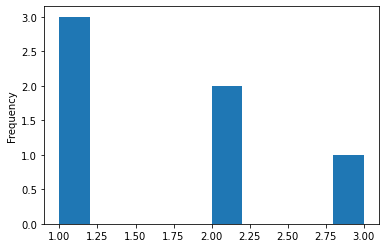

In [307]:
import matplotlib.pyplot as plt
c.plot(kind='hist')  #‘line’ : line plot (default)

# ‘bar’ : vertical bar plot

# ‘barh’ : horizontal bar plot

# ‘hist’ : histogram

# ‘box’ : boxplot

# ‘kde’ : Kernel Density Estimation plot

# ‘density’ : same as ‘kde’

# ‘area’ : area plot

# ‘pie’ : pie plot

# ‘scatter’ : scatter plot (DataFrame only)

# ‘hexbin’ : hexbin plot (DataFrame only)


<AxesSubplot:>

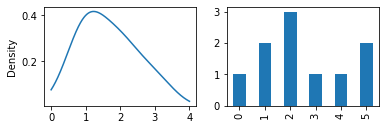

In [311]:
plt.subplot(221)   #horizontal axix, for the verticle used 211,212
c.plot(kind='kde')
plt.subplot(222)
c.plot(kind='bar')

# Data Frame

In [314]:
import seaborn as sns
df = sns.load_dataset('iris')

In [315]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [317]:
df = pd.DataFrame(df)  #covert to DatraFrame

In [320]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [321]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [323]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [330]:
# df['sepal_length'].info()    series has no attribute info

In [337]:
df.select_dtypes(include='float64')  #Return a subset of the DataFrame's columns based on the column dtypes.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [338]:
df.select_dtypes(exclude='float64')

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [341]:
df.values  #Return a Numpy representation of the DataFrame.

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [342]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object')]

In [343]:
df.ndim

2

In [346]:
df.size

750

In [347]:
df.shape

(150, 5)

In [348]:
df.empty

False

In [349]:
df1 = df.copy()

In [351]:
df1['sepal_length'].astype('int64')  # change the data type

0      5
1      4
2      4
3      4
4      5
      ..
145    6
146    6
147    6
148    6
149    5
Name: sepal_length, Length: 150, dtype: int64

In [354]:
df1.convert_dtypes()   #Convert columns to best possible dtypes using dtypes supporting

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [357]:
df1.bool

<bound method NDFrame.bool of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [365]:
df1.at[4,'sepal_width']  # specific columns/raw name    you can access the single item

3.6

In [366]:
df1.iat[4,1]  # position

3.6

In [368]:
df1.loc[0:5,'sepal_length':'sepal_width']     #you can access the group of tha data

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9


In [372]:
df1.iloc[0:6, 0:2]   #here 6 and 2 are exclusive

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9


In [376]:
df1.insert(2,'nikunj',np.arange(0,150,1))


ValueError: cannot insert nikunj, already exists

In [377]:
df1.head()

,sepal_length,sepal_width,nikunj,petal_length,petal_width,species
0,5.1,3.5,0,1.4,0.2,setosa
1,4.9,3.0,1,1.4,0.2,setosa
2,4.7,3.2,2,1.3,0.2,setosa
3,4.6,3.1,3,1.5,0.2,setosa
4,5.0,3.6,4,1.4,0.2,setosa


In [378]:
# df1.__iter__()   Iterate over info axis.

In [383]:
df1.items()  #Iterate over (column name, Series) pairs.

<generator object DataFrame.items at 0x00000139501D4E40>

In [384]:
df1.keys()  #Get the 'info axis' (see Indexing for more)

Index(['sepal_length', 'sepal_width', 'nikunj', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [385]:
# DataFrame.iterrows()

# Iterate over DataFrame rows as (index, Series) pairs.

In [388]:
df1.lookup([row_labels:2,col_labels="nikinj"])

SyntaxError: invalid syntax (Temp/ipykernel_6516/917350977.py, line 1)

In [391]:
df1.pop('sepal_width')  #Return item and drop from frame. Raise KeyError if not found.

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [394]:
df1['sepal_length'].where(df1['sepal_length']>6)  #Replace values where the condition is False.

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    NaN
Name: sepal_length, Length: 150, dtype: float64

In [396]:
df1['sepal_length'].mask(df1['sepal_length']>6) #Replace values where the condition is True.

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    NaN
146    NaN
147    NaN
148    NaN
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [409]:
df1[df1.sepal_length>df1.petal_width]    #Query the columns of a DataFrame with a boolean expression.

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa
2,4.7,1.3,0.2,setosa
3,4.6,1.5,0.2,setosa
4,5.0,1.4,0.2,setosa
...,...,...,...,...
145,6.7,5.2,2.3,virginica
146,6.3,5.0,1.9,virginica
147,6.5,5.2,2.0,virginica
148,6.2,5.4,2.3,virginica


In [410]:
df1.query('sepal_length>petal_width') #2nd type of the query method

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa
2,4.7,1.3,0.2,setosa
3,4.6,1.5,0.2,setosa
4,5.0,1.4,0.2,setosa
...,...,...,...,...
145,6.7,5.2,2.3,virginica
146,6.3,5.0,1.9,virginica
147,6.5,5.2,2.0,virginica
148,6.2,5.4,2.3,virginica


In [414]:
df1.drop('species',axis=1, inplace=True)

In [415]:
df1.add(10)

,sepal_length,petal_length,petal_width
0,15.1,11.4,10.2
1,14.9,11.4,10.2
2,14.7,11.3,10.2
3,14.6,11.5,10.2
4,15.0,11.4,10.2
...,...,...,...
145,16.7,15.2,12.3
146,16.3,15.0,11.9
147,16.5,15.2,12.0
148,16.2,15.4,12.3


In [416]:
df1.sub(5)

,sepal_length,petal_length,petal_width
0,0.1,-3.6,-4.8
1,-0.1,-3.6,-4.8
2,-0.3,-3.7,-4.8
3,-0.4,-3.5,-4.8
4,0.0,-3.6,-4.8
...,...,...,...
145,1.7,0.2,-2.7
146,1.3,0.0,-3.1
147,1.5,0.2,-3.0
148,1.2,0.4,-2.7


In [417]:
df1.mul(5)

,sepal_length,petal_length,petal_width
0,25.5,7.0,1.0
1,24.5,7.0,1.0
2,23.5,6.5,1.0
3,23.0,7.5,1.0
4,25.0,7.0,1.0
...,...,...,...
145,33.5,26.0,11.5
146,31.5,25.0,9.5
147,32.5,26.0,10.0
148,31.0,27.0,11.5


In [418]:
df1.div(10)

,sepal_length,petal_length,petal_width
0,0.51,0.14,0.02
1,0.49,0.14,0.02
2,0.47,0.13,0.02
3,0.46,0.15,0.02
4,0.50,0.14,0.02
...,...,...,...
145,0.67,0.52,0.23
146,0.63,0.50,0.19
147,0.65,0.52,0.20
148,0.62,0.54,0.23


In [419]:
df1.floordiv(10)

,sepal_length,petal_length,petal_width
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
145,0.0,0.0,0.0
146,0.0,0.0,0.0
147,0.0,0.0,0.0
148,0.0,0.0,0.0


In [420]:
df1.radd(10)

,sepal_length,petal_length,petal_width
0,15.1,11.4,10.2
1,14.9,11.4,10.2
2,14.7,11.3,10.2
3,14.6,11.5,10.2
4,15.0,11.4,10.2
...,...,...,...
145,16.7,15.2,12.3
146,16.3,15.0,11.9
147,16.5,15.2,12.0
148,16.2,15.4,12.3


In [421]:
df1.lt(6)  #gt, le, ge, ne, eq, 

,sepal_length,petal_length,petal_width
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
145,False,True,True
146,False,True,True
147,False,True,True
148,False,True,True


In [422]:
df1 = pd.DataFrame({'A': [0, 0], 'B': [4, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})

In [423]:
df1, df2

(   A  B
 0  0  4
 1  0  4,
    A  B
 0  1  3
 1  1  3)

In [426]:
small = lambda a, b : a if a.sum()<b.sum() else b

In [427]:
df1.combine(df2,small)

,A,B
0,0,3
1,0,3


In [430]:
df1.combine(df2, np.minimum)

,A,B
0,0,3
1,0,3


In [431]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])

In [433]:
df.agg(['sum', 'min', 'max','mean'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0
max,7.0,8.0,9.0
mean,4.0,5.0,6.0


In [434]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [435]:
df.transform(lambda x :x+1)

,A,B,C
0,2.0,3.0,4.0
1,5.0,6.0,7.0
2,8.0,9.0,10.0
3,NaN,NaN,NaN


In [441]:
df = sns.load_dataset('iris')

In [443]:
df.groupby(['species']).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [445]:
df['sepal_length'].rolling(5).mean()

0       NaN
1       NaN
2       NaN
3       NaN
4      4.86
       ... 
145    6.58
146    6.46
147    6.60
148    6.48
149    6.32
Name: sepal_length, Length: 150, dtype: float64

In [450]:
df['sepal_length'].expanding(2).sum()  #Provide expanding window calculations.  like continuous

0        NaN
1       10.0
2       14.7
3       19.3
4       24.3
       ...  
145    851.6
146    857.9
147    864.4
148    870.6
149    876.5
Name: sepal_length, Length: 150, dtype: float64

In [451]:
df.ewm(com=0.5).mean()

,sepal_length,sepal_width,petal_length,petal_width
0,5.100000,3.500000,1.400000,0.200000
1,4.950000,3.125000,1.400000,0.200000
2,4.776923,3.176923,1.330769,0.200000
3,4.657500,3.125000,1.445000,0.200000
4,4.886777,3.442975,1.414876,0.200000
...,...,...,...,...
145,6.686765,3.075285,5.360885,2.334455
146,6.428922,2.691762,5.120295,2.044818
147,6.476307,2.897254,5.173432,2.014939
148,6.292102,3.232418,5.324477,2.204980


In [455]:
df.drop('species', axis=1, inplace=True)

In [456]:
df.abs()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [457]:
df.clip(5,6)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,5.0,5.0,5.0
1,5.0,5.0,5.0,5.0
2,5.0,5.0,5.0,5.0
3,5.0,5.0,5.0,5.0
4,5.0,5.0,5.0,5.0
...,...,...,...,...
145,6.0,5.0,5.2,5.0
146,6.0,5.0,5.0,5.0
147,6.0,5.0,5.2,5.0
148,6.0,5.0,5.4,5.0


In [458]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [462]:
df1 = pd.DataFrame({"A":[1, 5, 7, 8], 
                    "B":[5, 8, 4, 3],
                    "C":[10, 4, 9, 3]})
   
df2 = pd.DataFrame({"A":[5, 3, 6, 4],
                    "B":[11, 2, 4, 3],
                    "C":[4, 3, 8, 5]})

In [465]:
df1.corrwith(df2)

A   -0.041703
B   -0.151186
C    0.395437
dtype: float64

In [466]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
dtype: int64

In [467]:
df.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [469]:
df.diff()  #First discrete difference of element.

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,-0.2,-0.5,0.0,0.0
2,-0.2,0.2,-0.1,0.0
3,-0.1,-0.1,0.2,0.0
4,0.4,0.5,-0.1,0.0
...,...,...,...,...
145,0.0,-0.3,-0.5,-0.2
146,-0.4,-0.5,-0.2,-0.4
147,0.2,0.5,0.2,0.1
148,-0.3,0.4,0.2,0.3


In [470]:
df.kurt()

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

In [471]:
df.mad()

sepal_length    0.687556
sepal_width     0.336782
petal_length    1.562747
petal_width     0.658133
dtype: float64

In [472]:
df.max()

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64

In [473]:
df.min()

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64

In [474]:
df.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [476]:
df.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [481]:
df.mode()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.4,0.2
1,NaN,NaN,1.5,NaN


In [482]:
df.rank()

,sepal_length,sepal_width,petal_length,petal_width
0,37.0,128.5,18.0,20.0
1,19.5,70.5,18.0,20.0
2,10.5,101.0,8.0,20.0
3,7.5,89.0,31.0,20.0
4,27.5,133.5,18.0,20.0
...,...,...,...,...
145,126.5,70.5,117.5,140.5
146,104.0,15.5,106.5,119.0
147,118.0,70.5,117.5,124.5
148,97.5,119.5,121.5,140.5


In [485]:
df.round()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [486]:
df.skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [487]:
df.var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [488]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
dtype: int64

In [492]:
df.value_counts().sum()

150

In [494]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [495]:
df.filter(['sepal_length', 'sepal_width'])

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [497]:
# DataFrame.last(offset)

# Select final periods of time series data based on a date offset.

In [499]:
df.sample(frac=0.5, random_state=1)   #50% data selected for the sample

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
...,...,...,...,...
55,5.7,2.8,4.5,1.3
144,6.7,3.3,5.7,2.5
138,6.0,3.0,4.8,1.8
46,5.1,3.8,1.6,0.2


In [505]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [507]:
df.take([0,5,1])

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
5,5.4,3.9,1.7,0.4
1,4.9,3.0,1.4,0.2


In [526]:
df.truncate(before=5, after=10)

,sepal_length,sepal_width,petal_length,petal_width
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2


In [519]:
# df.truncate(before='sepal_width', after='petal_length', axis='columns')

In [520]:
## Missing value

In [521]:
# df.fillna(methods={'backfill', 'bfill', 'pad', 'ffill', None})

In [522]:
s = pd.Series([np.nan, "single_one", np.nan,
               "fill_two_more", np.nan, np.nan, np.nan,
               4.71, np.nan])

In [523]:
s.interpolate(method='pad', limit=2)

0              NaN
1       single_one
2       single_one
3    fill_two_more
4    fill_two_more
5    fill_two_more
6              NaN
7             4.71
8             4.71
dtype: object

In [525]:
s = pd.Series([0, 1, np.nan, 3])
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [527]:
# DataFrame.pad([axis, inplace, limit, downcast])

# Synonym for DataFrame.fillna() with method='ffill

In [531]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [532]:
df.pivot(index='foo', columns='bar')

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [533]:
df.pivot_table(index='foo', columns='bar')

baz      
bar   A  B  C
foo          
one   1  2  3
two   4  5  6

In [534]:
df.melt()

,variable,value
0,foo,one
1,foo,one
2,foo,one
3,foo,two
4,foo,two
5,foo,two
6,bar,A
7,bar,B
8,bar,C
9,bar,A
